In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crab-age-prediction/CrabAgePrediction.csv


Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64
            Length     Diameter       Height       Weight  Shucked Weight  \
count  3893.000000  3893.000000  3893.000000  3893.000000     3893.000000   
mean      1.311306     1.020893     0.349374    23.567275       10.207342   
std       0.300431     0.248233     0.104976    13.891201        6.275275   
min       0.187500     0.137500     0.000000     0.056699        0.028349   
25%       1.125000     0.875000     0.287500    12.672227        5.343881   
50%       1.362500     1.062500     0.362500    22.792998        9.539607   
75%       1.537500     1.200000     0.412500    32.786197       14.273973   
max       2.037500     1.625000     2.825000    80.101512       42.184056   

       Viscera Weight  Shell Weight          Age  
count     3893.000000   3893.000000  3893.000000  
mean       

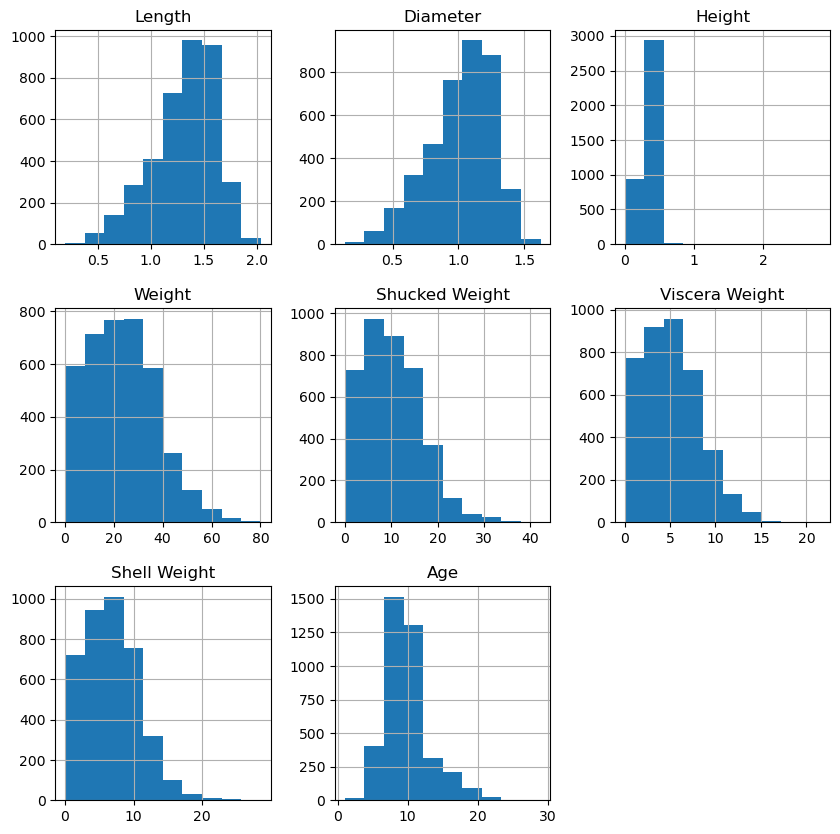

/tmp/ipykernel_20/1068347101.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crab_age.corr()


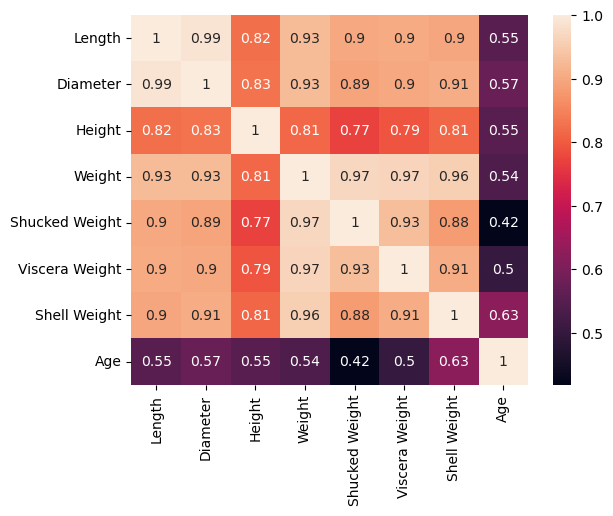

In [2]:
# Load the dataset
crab_age = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')

# Check for missing values
print(crab_age.isnull().sum())

# Descriptive statistics
print(crab_age.describe())

# Visualize distributions
crab_age.hist(figsize=(10, 10))
plt.show()

# Correlation analysis
correlation_matrix = crab_age.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


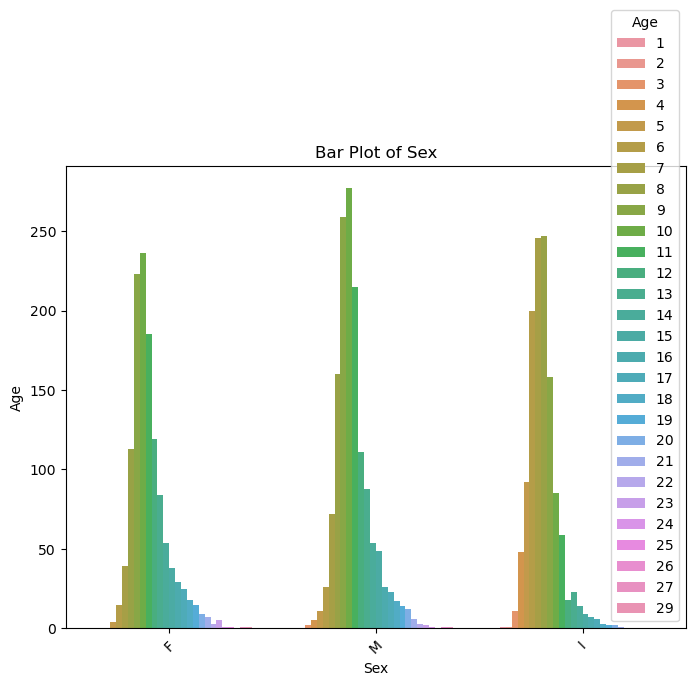

In [3]:
# Example: Creating a bar plot of a non-numeric column
plt.figure(figsize=(8, 6))
df = pd.DataFrame(crab_age)
sns.countplot(x='Sex',hue ='Age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Bar Plot of Sex')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [4]:
# Perform feature transformation or combination
crab_age['bmi'] = crab_age['Weight'] / (crab_age['Length'] * crab_age['Length'])

In [5]:
crab_age.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,bmi
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,11.922010
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,6.856519
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,7.387578
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,9.763830
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,8.764106
